1 Preparing the Datasets

1.1 Loading the datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import TestFunction
from datetime import datetime

CharacterMeta = TestFunction.getCharacterMeta(r'C:\Users\makss\ada-2024-project-5pebbles\data\RawDatasets\MovieSummaries\character.metadata.tsv')
MovieMeta = TestFunction.getMovieMeta(r'C:\Users\makss\ada-2024-project-5pebbles\data\RawDatasets\MovieSummaries\movie.metadata.tsv')
CharacterMetaCleaned = TestFunction.getCharacterMetaCleaned(r'C:\Users\makss\ada-2024-project-5pebbles\data\ProcessedDatasets\cleaned.character.metadata.tsv')


1.2 Cleaning the datasets and looking at some informations

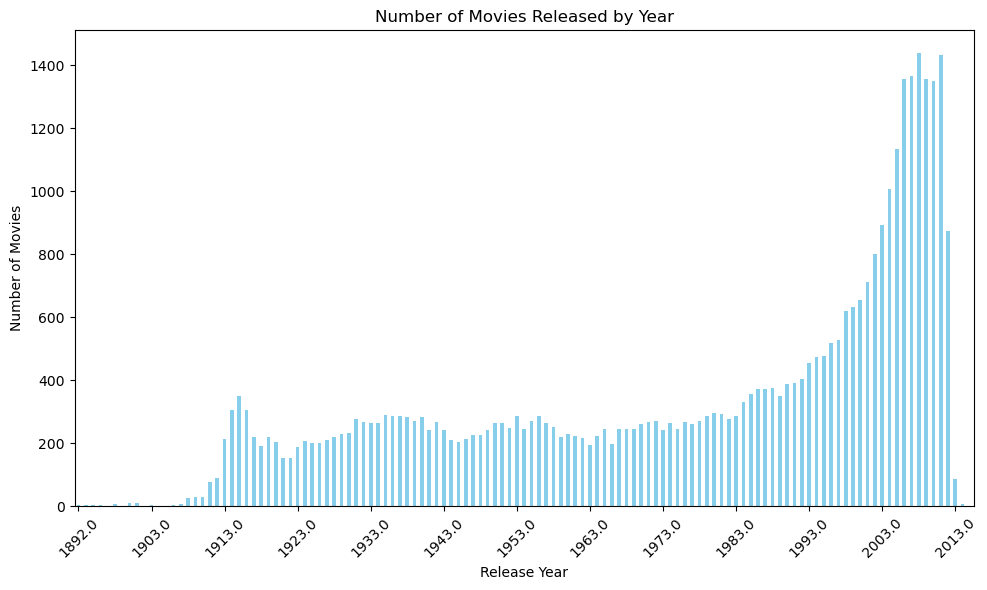

In [2]:
MovieMeta = TestFunction.plot_movies_by_year(MovieMeta)


=== Most Common Movie Genres ===
Drama: 34007
Comedy: 16349
Romance Film: 10234
Black-and-white: 9094
Action: 8797
Thriller: 8743
Short Film: 8141
World cinema: 7155
Crime Fiction: 6948
Indie: 6897


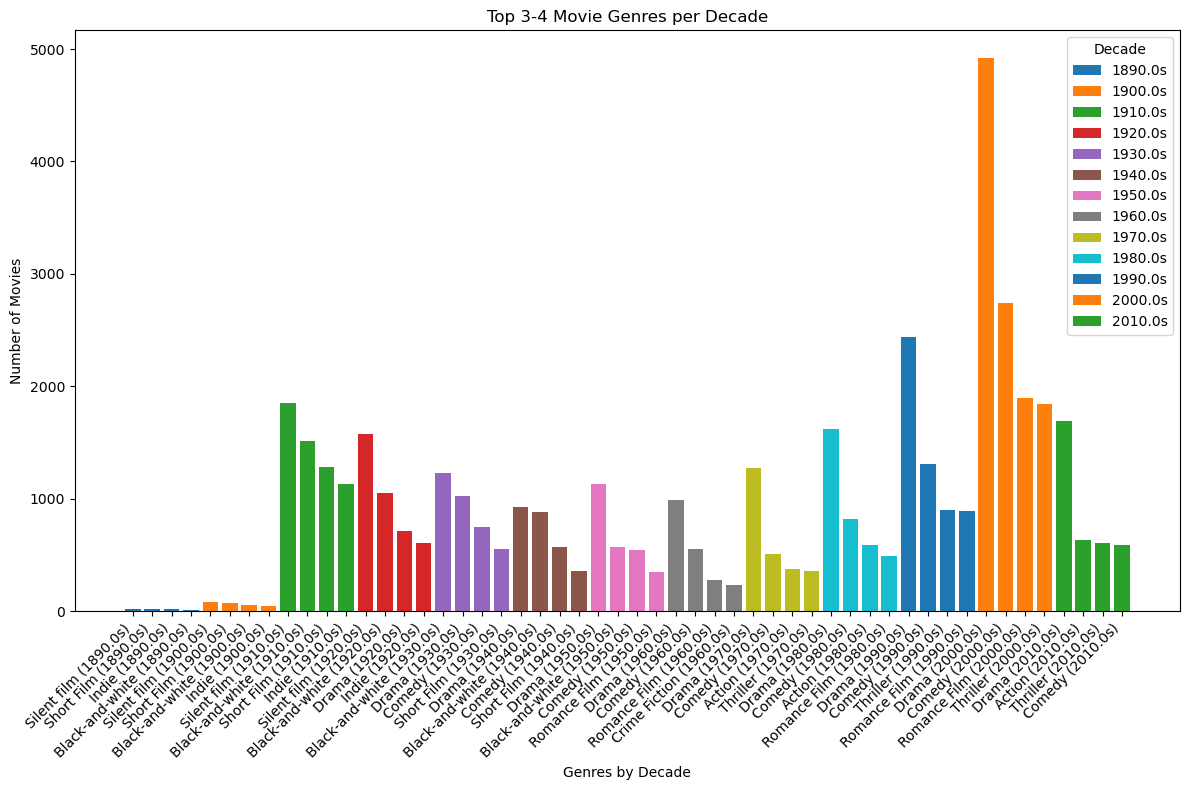

Top 4 Most Popular Movie Genres by Decade:

1890.0s:
  Genre: Silent film - Count: 24
  Genre: Short Film - Count: 23
  Genre: Indie - Count: 19
  Genre: Black-and-white - Count: 15

1900.0s:
  Genre: Silent film - Count: 87
  Genre: Short Film - Count: 78
  Genre: Black-and-white - Count: 57
  Genre: Indie - Count: 49

1910.0s:
  Genre: Silent film - Count: 1850
  Genre: Black-and-white - Count: 1516
  Genre: Short Film - Count: 1281
  Genre: Indie - Count: 1129

1920.0s:
  Genre: Silent film - Count: 1578
  Genre: Black-and-white - Count: 1052
  Genre: Drama - Count: 714
  Genre: Indie - Count: 605

1930.0s:
  Genre: Black-and-white - Count: 1235
  Genre: Drama - Count: 1022
  Genre: Comedy - Count: 749
  Genre: Short Film - Count: 556

1940.0s:
  Genre: Drama - Count: 930
  Genre: Black-and-white - Count: 882
  Genre: Comedy - Count: 574
  Genre: Short Film - Count: 358

1950.0s:
  Genre: Drama - Count: 1134
  Genre: Black-and-white - Count: 571
  Genre: Comedy - Count: 544
  Genre:

In [3]:
# Initialize a set to store all unique genres
all_genres = set()

# Create a dictionary to store the count of each genre
genre_counts = {}

# Iterate through each row in the 'Movie genres' column
for genres_dict_str in MovieMeta['Movie genres'].dropna():
    # Use eval to convert the string to a dictionary (assuming correct format)
    genres_dict = eval(genres_dict_str)
        
    # Extract only the genre names (values of the dictionary)
    genres = genres_dict.values()
        
    # Update the set of all unique genres
    all_genres.update(genres)
        
    # Count each genre's occurrences
    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1


MovieMeta, sorted_genres, genre_counts_by_decade, top_genres_by_decade = TestFunction.plot_top_genres_by_decade(genre_counts, MovieMeta)

2 Analysis

2.1 Distribution of Actors Based on Zodiac Sign

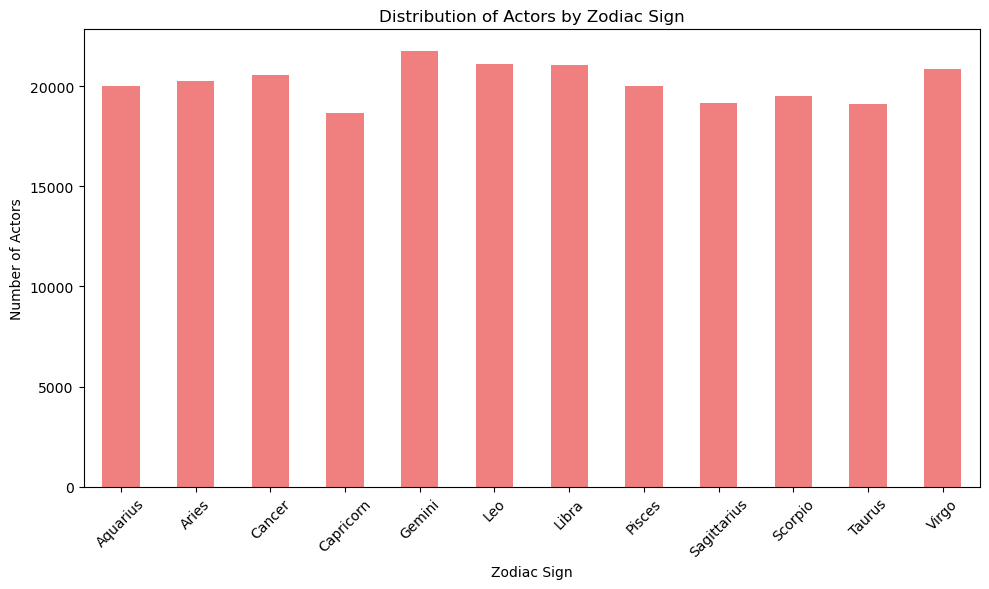

Actor Count by Zodiac Sign:
Aquarius: 20001
Aries: 20277
Cancer: 20577
Capricorn: 18653
Gemini: 21758
Leo: 21125
Libra: 21061
Pisces: 20017
Sagittarius: 19160
Scorpio: 19520
Taurus: 19100
Virgo: 20847


In [4]:
CharacterMeta, CharacterMetaCleaned, zodiac_counts = TestFunction.plot_zodiac_distribution(CharacterMeta, CharacterMetaCleaned, TestFunction.get_zodiac_sign)

Analysis:
What we can see is that, the number of actors in each of the zodiac sign is close to each other, but there is still some small variations. So we will have to take this into account when we normalize

2.2 Actors Zodiac Sign in Film Genres

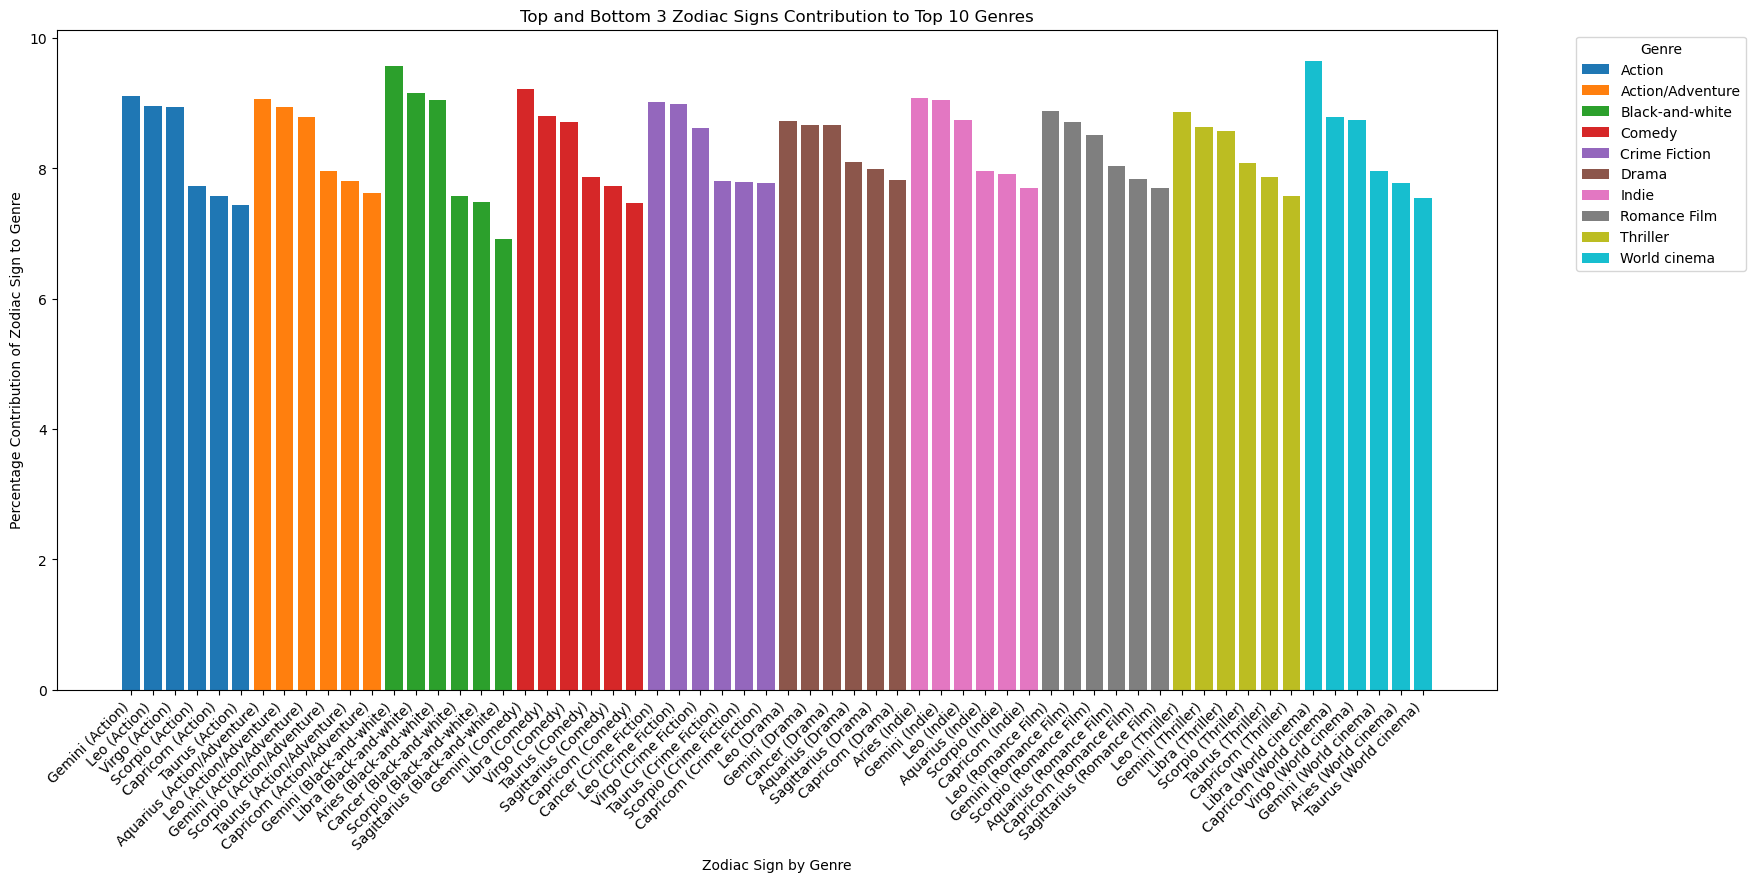

Top and Bottom 3 Zodiac Signs Contribution to Each of the Top 10 Genres:

Genre: Action
  Zodiac Sign: Gemini - Contribution: 9.11%
  Zodiac Sign: Leo - Contribution: 8.95%
  Zodiac Sign: Virgo - Contribution: 8.94%
  Zodiac Sign: Scorpio - Contribution: 7.74%
  Zodiac Sign: Capricorn - Contribution: 7.57%
  Zodiac Sign: Taurus - Contribution: 7.44%

Genre: Action/Adventure
  Zodiac Sign: Aquarius - Contribution: 9.06%
  Zodiac Sign: Leo - Contribution: 8.95%
  Zodiac Sign: Gemini - Contribution: 8.79%
  Zodiac Sign: Scorpio - Contribution: 7.95%
  Zodiac Sign: Taurus - Contribution: 7.80%
  Zodiac Sign: Capricorn - Contribution: 7.63%

Genre: Black-and-white
  Zodiac Sign: Gemini - Contribution: 9.57%
  Zodiac Sign: Libra - Contribution: 9.16%
  Zodiac Sign: Aries - Contribution: 9.05%
  Zodiac Sign: Cancer - Contribution: 7.58%
  Zodiac Sign: Scorpio - Contribution: 7.48%
  Zodiac Sign: Sagittarius - Contribution: 6.92%

Genre: Comedy
  Zodiac Sign: Gemini - Contribution: 9.21%
  Zod

In [8]:
merged_data = TestFunction.plot_zodiac_contribution_to_genres(CharacterMetaCleaned, MovieMeta, genre_counts)

Analysis:
Here we decided to take the 10 genres with the most films, and to look at how many actors of each zodic sign were playing in those genres. We only plotted the 3 highest representatives and the 3 lowest one among the zodiac signs. What we obtained is that there seems to be some preferences, but there could be a bias based on the number of actors in each of the categories. We then decided to normalized our data to see if there is a difference

2.3 Normalization and Weighted Average

Total unique actors: 242096

Zodiac Sign Weights:
  Zodiac Sign: Aquarius - Weight: 1.01
  Zodiac Sign: Aries - Weight: 0.99
  Zodiac Sign: Cancer - Weight: 0.98
  Zodiac Sign: Capricorn - Weight: 1.08
  Zodiac Sign: Gemini - Weight: 0.93
  Zodiac Sign: Leo - Weight: 0.96
  Zodiac Sign: Libra - Weight: 0.96
  Zodiac Sign: Pisces - Weight: 1.01
  Zodiac Sign: Sagittarius - Weight: 1.05
  Zodiac Sign: Scorpio - Weight: 1.03
  Zodiac Sign: Taurus - Weight: 1.06
  Zodiac Sign: Virgo - Weight: 0.97


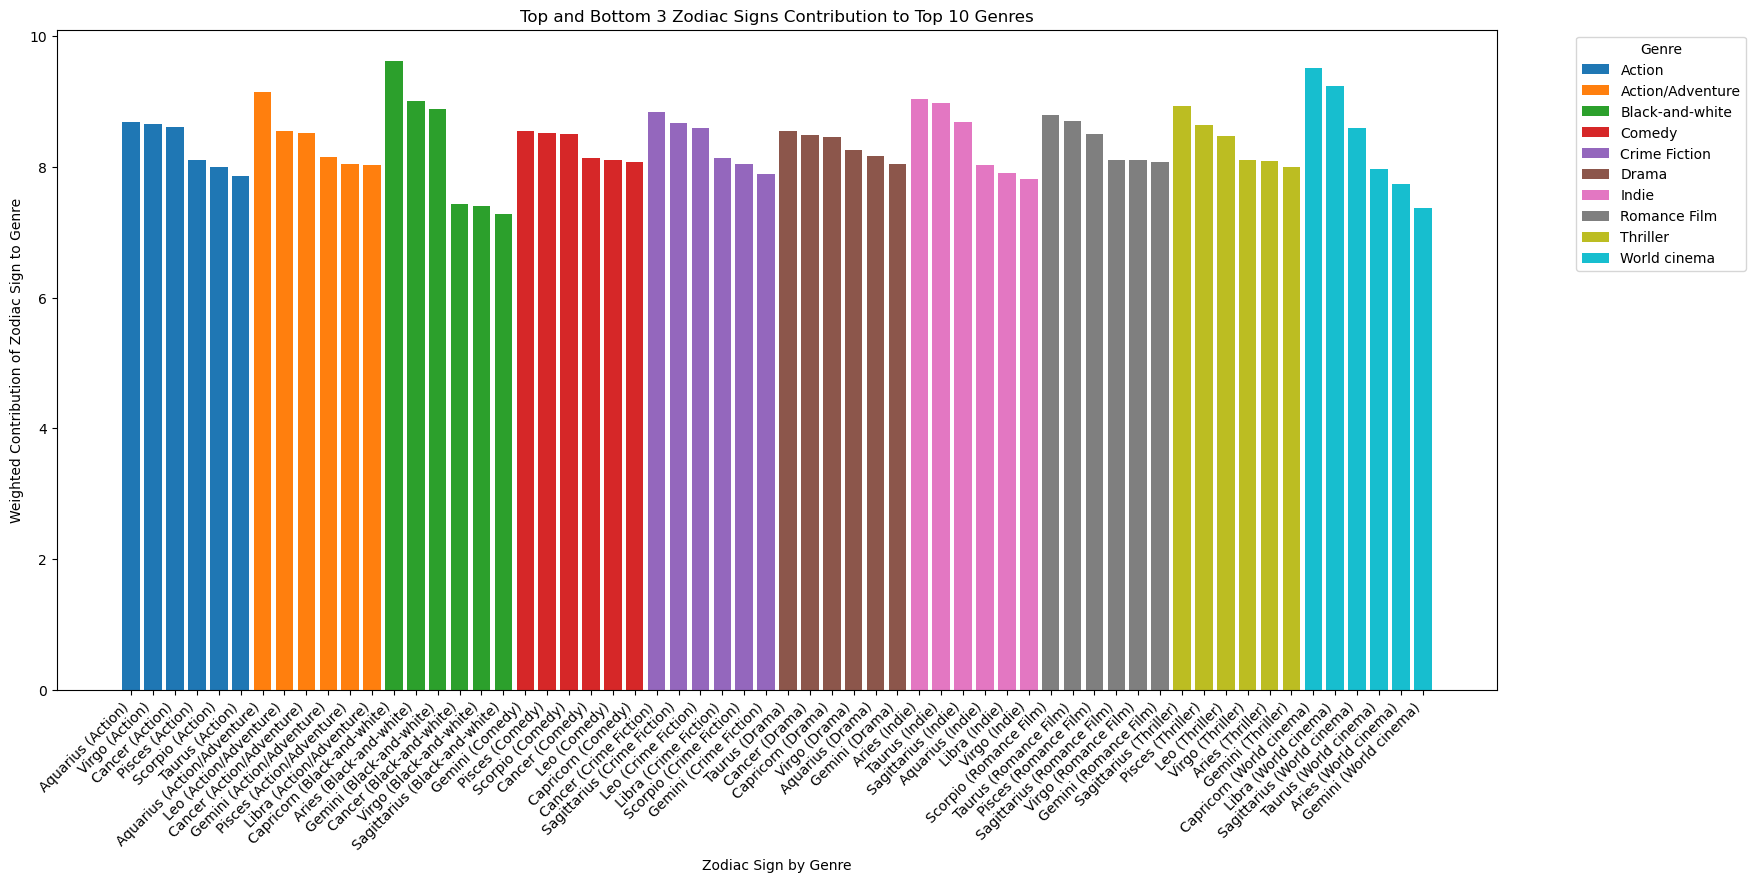

Top and Bottom 3 Zodiac Signs Contribution to Each of the Top 10 Genres:

Genre: Action
  Zodiac Sign: Aquarius - Weighted Contribution: 8.68%
  Zodiac Sign: Virgo - Weighted Contribution: 8.65%
  Zodiac Sign: Cancer - Weighted Contribution: 8.60%
  Zodiac Sign: Pisces - Weighted Contribution: 8.11%
  Zodiac Sign: Scorpio - Weighted Contribution: 8.00%
  Zodiac Sign: Taurus - Weighted Contribution: 7.86%

Genre: Action/Adventure
  Zodiac Sign: Aquarius - Weighted Contribution: 9.14%
  Zodiac Sign: Leo - Weighted Contribution: 8.55%
  Zodiac Sign: Cancer - Weighted Contribution: 8.52%
  Zodiac Sign: Gemini - Weighted Contribution: 8.15%
  Zodiac Sign: Pisces - Weighted Contribution: 8.04%
  Zodiac Sign: Libra - Weighted Contribution: 8.03%

Genre: Black-and-white
  Zodiac Sign: Capricorn - Weighted Contribution: 9.62%
  Zodiac Sign: Aries - Weighted Contribution: 9.01%
  Zodiac Sign: Gemini - Weighted Contribution: 8.88%
  Zodiac Sign: Cancer - Weighted Contribution: 7.43%
  Zodiac Sign

In [10]:
TestFunction.plot_zodiac_weighted_contribution_to_genres(genre_counts_by_zodiac, zodiac_counts)

Analysis:
After normalizing the data and weighting each zodiac sign, we can see that the preferences of the actors are more difficult to see. There are still some cases like the Black And White or World Cinema, where some zodiac sign can reach up to 9.6%! The mean value in case of no preferences at all would be 8.3%, the difference may not seems important, but as we have a lot of data, it's enough to consider doing statistical analysis.